In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import panel as pn
import holoviews as hv
import plotly.express as px
from panel.template import BootstrapTemplate
from holoviews.operation.datashader import datashade, rasterize
import datashader as ds
import geoviews as gv
import hvplot.pandas
import colorcet as cc
from geopandas import GeoDataFrame


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/Users/owenmcginley/opt/anaconda3/envs/Summer_Project/lib/python3.10/site-packages/dask/dataframe/__init__.py:31: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [2]:
stations = gpd.read_file('/Users/owenmcginley/Documents/Summer Projects/Regional_Rail_Stations')
philly_zoning = gpd.read_file('/Users/owenmcginley/Documents/Summer Projects/Zoning_BaseDistricts')
bucks_zoning = gpd.read_file('/Users/owenmcginley/Documents/Summer Projects/Bucks_County_Municipal_Zoning')
ridership = pd.read_csv('/Users/owenmcginley/Documents/Summer Projects/Septa_RR_Ridership_2023.csv')

metro_stations = gpd.read_file('/Users/owenmcginley/Documents/Summer Projects/Metro_Stations')

zoning = pd.concat([philly_zoning, bucks_zoning])
zoning['Combined_Zoning'] = zoning['ZONINGGROU'].fillna('') + zoning['Zoning'].fillna('')
zoning = zoning.drop(['ZONINGGROU', 'Zoning'], axis=1)

In [3]:
zoning_categories = {
    "RSD-1": ("Residential Zoning Districts", "Single-Family Detached"),
    "RSD-2": ("Residential Zoning Districts", "Single-Family Detached"),
    "RSD-3": ("Residential Zoning Districts", "Single-Family Detached"),
    "RSA-1": ("Residential Zoning Districts", "Single-Family Attached"),
    "RSA-2": ("Residential Zoning Districts", "Single-Family Attached"),
    "RSA-3": ("Residential Zoning Districts", "Single-Family Attached"),
    "RSA-4": ("Residential Zoning Districts", "Single-Family Attached"),
    "RSA-5": ("Residential Zoning Districts", "Single-Family Attached"),
    "RSA-6": ("Residential Zoning Districts", "Single-Family Attached"),
    "RM-1": ("Residential Zoning Districts", "Multi-Family Residential"),
    "RM-2": ("Residential Zoning Districts", "Multi-Family Residential"),
    "RM-3": ("Residential Zoning Districts", "Multi-Family Residential"),
    "RM-4": ("Residential Zoning Districts", "Multi-Family Residential"),
    "RMX-1": ("Residential Zoning Districts", "Mixed-Use Residential"),
    "RMX-2": ("Residential Zoning Districts", "Mixed-Use Residential"),
    "RMX-3": ("Residential Zoning Districts", "Mixed-Use Residential"),
    "RTA-1": ("Residential Zoning Districts", "Two-Family Residential"),
    "RTA-2": ("Residential Zoning Districts", "Two-Family Residential"),
    "CMX-1": ("Commercial Zoning Districts", "Neighborhood Commercial"),
    "CMX-2": ("Commercial Zoning Districts", "Neighborhood Commercial"),
    "CMX-2.5": ("Commercial Zoning Districts", "Neighborhood Commercial"),
    "CMX-3": ("Commercial Zoning Districts", "Community and Regional Commercial"),
    "CMX-4": ("Commercial Zoning Districts", "Community and Regional Commercial"),
    "CMX-5": ("Commercial Zoning Districts", "Center City Commercial"),
    "CA-1": ("Commercial Zoning Districts", "Auto-Oriented Commercial"),
    "CA-2": ("Commercial Zoning Districts", "Auto-Oriented Commercial"),
    "I-1": ("Industrial Zoning Districts", "Light and Medium Industrial"),
    "I-2": ("Industrial Zoning Districts", "Light and Medium Industrial"),
    "I-3": ("Industrial Zoning Districts", "Heavy Industrial"),
    "I-P": ("Industrial Zoning Districts", "Port Industrial"),
    "IRMX": ("Industrial Zoning Districts", "Industrial Mixed-Use"),
    "ICMX": ("Industrial Zoning Districts", "Industrial Mixed-Use"),
    "SP-INS": ("Special Purpose Zoning Districts", "Institutional"),
    "SP-CIV": ("Special Purpose Zoning Districts", "Civic, Educational and Medical"),
    "SP-ENT": ("Special Purpose Zoning Districts", "Entertainment"),
    "SP-PO-A": ("Special Purpose Zoning Districts", "Parks and Open Spaces"),
    "SP-PO-P": ("Special Purpose Zoning Districts", "Parks and Open Spaces"),
    "SP-STA": ("Special Purpose Zoning Districts", "Sports Stadium"),
    "SP-AIR": ("Special Purpose Zoning Districts", "Airport")
}
philly_zoning['LONG_CODE'] = philly_zoning['LONG_CODE'].astype(str)
philly_zoning['General_Category'] = philly_zoning['LONG_CODE'].map(zoning_categories).str[0]
philly_zoning['Specific_Category'] = philly_zoning['LONG_CODE'].map(zoning_categories).str[1]
philly_zoning.head()

,OBJECTID,CODE,CITYCOR,LONG_CODE,ZONINGGROU,PENDING,PENDINGBIL,PENDINGB_1,SUNSET_DAT,SUNSETBILL,SUNSETBI_1,Shape__Are,Shape__Len,geometry,General_Category,Specific_Category
0,1,SPPOA,0.0,SP-PO-A,Special Purpose,No,N/A,N/A,None,N/A,N/A,3371.062500,257.688146,"POLYGON ((-75.21633 39.95295, -75.21673 39.953...",Special Purpose Zoning Districts,Parks and Open Spaces
1,2,CMX2,0.0,CMX-2,Commercial/Commercial Mixed-Use,No,N/A,N/A,None,N/A,N/A,159.539062,63.896038,"POLYGON ((-75.14301 39.99895, -75.14299 39.998...",Commercial Zoning Districts,Neighborhood Commercial
2,3,RSA5,0.0,RSA-5,Residential/Residential Mixed-Use,No,N/A,N/A,None,N/A,N/A,1721.378906,182.886474,"POLYGON ((-75.06130 40.01405, -75.06135 40.014...",Residential Zoning Districts,Single-Family Attached
3,4,CMX1,0.0,CMX-1,Commercial/Commercial Mixed-Use,No,N/A,N/A,None,N/A,N/A,137.417969,55.579486,"POLYGON ((-75.10094 39.98413, -75.10097 39.984...",Commercial Zoning Districts,Neighborhood Commercial
4,5,CMX2,0.0,CMX-2,Commercial/Commercial Mixed-Use,No,N/A,N/A,None,N/A,N/A,524.609375,92.058804,"POLYGON ((-75.12863 40.01916, -75.12854 40.019...",Commercial Zoning Districts,Neighborhood Commercial


In [4]:
bucks_zoning.head() 

,OBJECTID_1,OBJECTID,OBJECTID_2,ZoningAbbr,Zoning,Symbol,Acre,Municipali,Website,GenZoning,Shape__Are,Shape__Len,geometry
0,1,274.0,2024.0,HI,Heavy Industrial,HI - Heavy Industrial - Bristol Borough,25.330607,Bristol Borough,https://ecode360.com/31427156,Industrial/Utility,175458.320312,1660.107291,"POLYGON ((-74.85151 40.11067, -74.85059 40.110..."
1,2,313.0,2025.0,HI,Heavy Industrial,HI - Heavy Industrial - Bristol Borough,2.563585,Bristol Borough,https://ecode360.com/31427156,Industrial/Utility,17759.964844,655.938301,"POLYGON ((-74.83995 40.11430, -74.83995 40.114..."
2,3,252.0,2026.0,NC,Neighborhood Commercial,NC - Neighborhood Commercial - Bristol Borough,11.049589,Bristol Borough,https://ecode360.com/31426799,Commercial,76530.351562,1949.005430,"POLYGON ((-74.84132 40.10781, -74.84180 40.107..."
3,4,256.0,2027.0,MX,Mixed Use,MX - Mixed Use - Bristol Borough,72.098237,Bristol Borough,https://ecode360.com/31427190,Mixed Use,499312.214844,2858.956460,"POLYGON ((-74.83991 40.09983, -74.84034 40.099..."
4,5,149.0,2028.0,C,Conservation,C - Conservation - Bristol Borough,57.191675,Bristol Borough,https://ecode360.com/31427237,Resource Protection,395961.679688,3291.486974,"POLYGON ((-74.85715 40.09043, -74.85999 40.091..."


<Axes: >

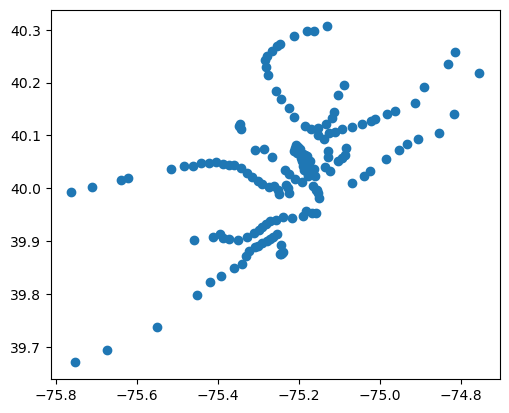

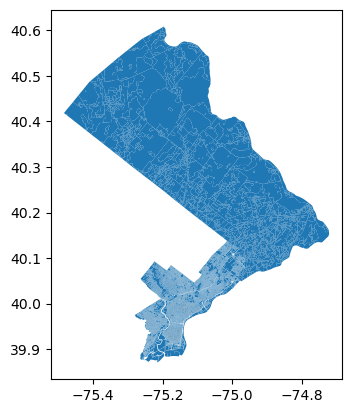

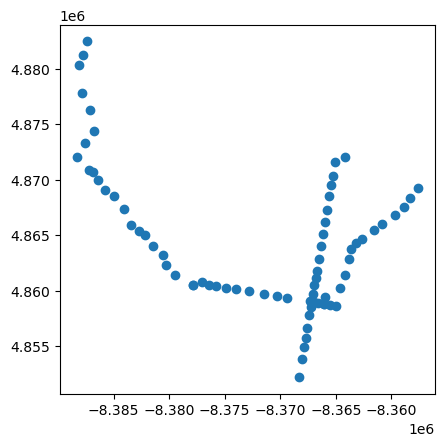

In [5]:
stations.plot()
zoning.plot()
metro_stations.plot()

In [ ]:
stations = stations.to_crs("EPSG:3347")
zoning = zoning.to_crs("EPSG:3347")
philly_zoning = philly_zoning.to_crs("EPSG:3347")
metro_stations = metro_stations.to_crs("EPSG:3347")
stations['Station_Na'] = np.where(stations['Station_Na'].duplicated(), stations['Station_Na'] + '_' + stations['Line_Name'], stations['Station_Na'])

In [ ]:
ridership.head()

,Line_Name,Daily_Ridership,Expenses,Revenue,On_Time_Percent,Unnamed: 5,Unnamed: 6
0,Airport Line,"4,041","$17,695,704","$2,273,693",96,NaN,NaN
1,Chestnut Hill East Line,"1,573","$12,326,908","$1,123,298",93,NaN,NaN
2,Chestnut Hill West Line,"1,752","$11,703,316","$1,955,915",94,NaN,NaN
3,Cynwyd Line,98,"$853,530","$85,800",96,NaN,NaN
4,Fox Chase Line,"2,001","$10,435,179","$1,921,986",91,NaN,NaN


In [ ]:
metro_stations = metro_stations[~(metro_stations['Route'] == 'Norristown Highspeed Line')]
metro_stations.head()


,FID,Route,Station,Latitude,Longitude,geometry
0,1,Broad Street Line,NRG,39.905434,-75.173936,POINT (7675150.622 591876.943)
1,2,Broad Street Line,Oregon,39.916815,-75.171339,POINT (7675032.079 593212.907)
2,3,Broad Street Line,Snyder,39.924386,-75.169681,POINT (7674947.161 594099.973)
3,4,Broad Street Line,Tasker-Morris,39.929848,-75.168501,POINT (7674884.506 594739.534)
4,5,Broad Street Line,Ellsworth-Federal,39.936194,-75.167129,POINT (7674811.662 595482.599)


In [ ]:
stations.head()


,FID,Line_Name,Station_Na,Latitude,Longitude,geometry
0,1,Airport Line,Airport Terminal A,39.875992,-75.246574,POINT (7669761.563 586894.188)
1,2,Airport Line,Airport Terminal B,39.876380,-75.244633,POINT (7669917.645 586982.577)
2,3,Airport Line,Airport Terminals C&D,39.877322,-75.241542,POINT (7670156.412 587159.663)
3,4,Airport Line,Airport Terminals E&F,39.878981,-75.240040,POINT (7670236.473 587380.384)
4,5,Airport Line,Eastwick,39.891651,-75.244981,POINT (7669429.595 588687.031)


In [ ]:
zoning.head()

,OBJECTID,CODE,CITYCOR,LONG_CODE,PENDING,PENDINGBIL,PENDINGB_1,SUNSET_DAT,SUNSETBILL,SUNSETBI_1,...,geometry,OBJECTID_1,OBJECTID_2,ZoningAbbr,Symbol,Acre,Municipali,Website,GenZoning,Combined_Zoning
0,1.0,SPPOA,0.0,SP-PO-A,No,N/A,N/A,None,N/A,N/A,...,"POLYGON ((7670063.285 596221.905, 7670026.838 ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Special Purpose
1,2.0,CMX2,0.0,CMX-2,No,N/A,N/A,None,N/A,N/A,...,"POLYGON ((7674999.549 603073.490, 7675001.826 ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Commercial/Commercial Mixed-Use
2,3.0,RSA5,0.0,RSA-5,No,N/A,N/A,None,N/A,N/A,...,"POLYGON ((7681580.877 606664.298, 7681576.861 ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Residential/Residential Mixed-Use
3,4.0,CMX1,0.0,CMX-1,No,N/A,N/A,None,N/A,N/A,...,"POLYGON ((7679072.205 602391.040, 7679068.221 ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Commercial/Commercial Mixed-Use
4,5.0,CMX2,0.0,CMX-2,No,N/A,N/A,None,N/A,N/A,...,"POLYGON ((7675629.210 605671.770, 7675636.690 ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Commercial/Commercial Mixed-Use


In [ ]:
# Assuming CRS is the same for both datasets
stations_buffered = stations.copy()
stations_buffered['geometry'] = stations.geometry.buffer(800)  # Buffer by 0.5 units (in the CRS unit, typically degrees or meters)


In [ ]:
zoning_near_stations = gpd.overlay(philly_zoning, stations_buffered, how='intersection')
zoning_near_stations.head()

,OBJECTID,CODE,CITYCOR,LONG_CODE,ZONINGGROU,PENDING,PENDINGBIL,PENDINGB_1,SUNSET_DAT,SUNSETBILL,...,Shape__Are,Shape__Len,General_Category,Specific_Category,FID,Line_Name,Station_Na,Latitude,Longitude,geometry
0,8,ICMX,0.0,ICMX,Industrial/Industrial Mixed-Use,No,N/A,N/A,None,N/A,...,28628.597656,885.963005,Industrial Zoning Districts,Industrial Mixed-Use,115,Trenton Line,Holmesburg Junction,40.032745,-75.023679,"POLYGON ((7684148.444 610426.648, 7684118.798 ..."
1,17,SPINS,0.0,SP-INS,Special Purpose,No,N/A,N/A,None,N/A,...,17060.304688,569.044320,Special Purpose Zoning Districts,Institutional,33,Joint,30th Street Station,39.956516,-75.181806,"POLYGON ((7672194.517 597114.523, 7672208.576 ..."
2,17,SPINS,0.0,SP-INS,Special Purpose,No,N/A,N/A,None,N/A,...,17060.304688,569.044320,Special Purpose Zoning Districts,Institutional,41,Joint,Penn Medicine,39.948198,-75.189932,"POLYGON ((7672292.665 597075.612, 7672294.731 ..."
3,32,CMX5,0.0,CMX-5,Commercial/Commercial Mixed-Use,No,N/A,N/A,None,N/A,...,4156.859375,292.755876,Commercial Zoning Districts,Center City Commercial,33,Joint,30th Street Station,39.956516,-75.181806,"POLYGON ((7673362.371 597233.279, 7673367.278 ..."
4,36,RSA3,0.0,RSA-3,Residential/Residential Mixed-Use,No,N/A,N/A,None,N/A,...,6509.144531,326.261580,Residential Zoning Districts,Single-Family Attached,28,Fox Chase Line,Cheltenham,40.057871,-75.092869,"POLYGON ((7677901.862 611231.134, 7677909.214 ..."


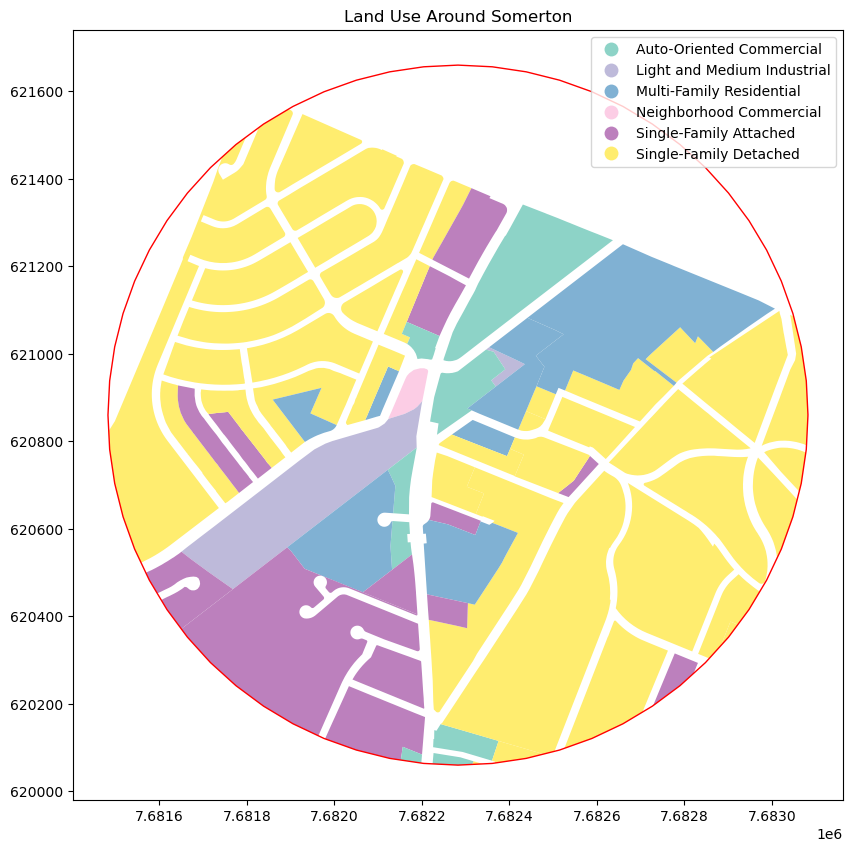

In [ ]:

# Plotting an example station buffer with land use
station_id = "Somerton"
station_area = zoning_near_stations[zoning_near_stations['Station_Na'] == station_id]

fig, ax = plt.subplots(figsize=(10, 10))
station_area.plot(ax=ax, column='Specific_Category', legend=True, cmap='Set3')
stations_buffered[stations_buffered['Station_Na'] == station_id].plot(ax=ax, color='none', edgecolor='red')
plt.title(f'Land Use Around {station_id}')
plt.show()


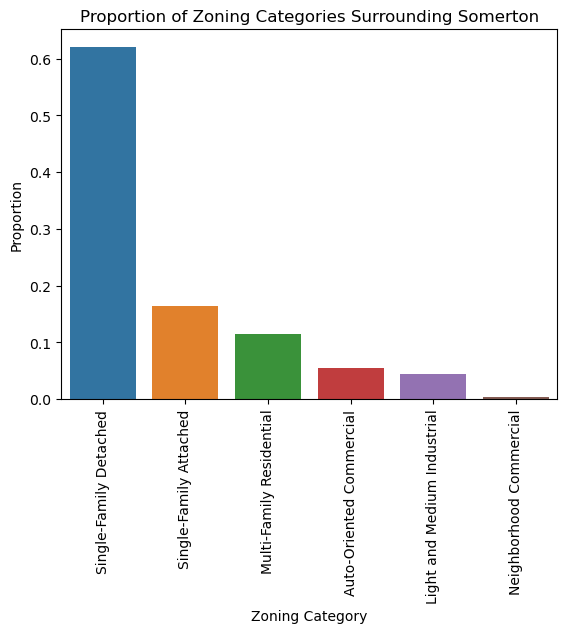

In [ ]:
station_id = "Somerton"
station_area = zoning_near_stations[zoning_near_stations['Station_Na'] == station_id]

station_area = station_area.groupby('Specific_Category')
station_area_total = station_area['Shape__Are'].sum()
station_area_proportion = station_area_total / station_area_total.sum()
station_area_proportion
station_area_proportion.sort_values(ascending=False, inplace=True)
sns.barplot(x=station_area_proportion.index, y=station_area_proportion.values, hue=station_area_proportion.index)
plt.ylabel('Proportion')
plt.xlabel('Zoning Category')
plt.xticks(rotation=90)
plt.xticks(station_area_proportion.index[:50])    # set here, ticks at step of 50
plt.title('Proportion of Zoning Categories Surrounding '+ str(station_id))
plt.show()

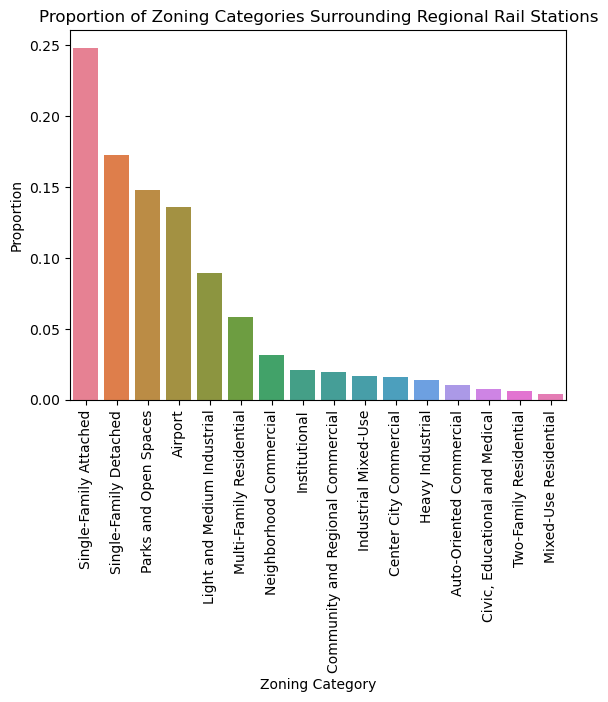

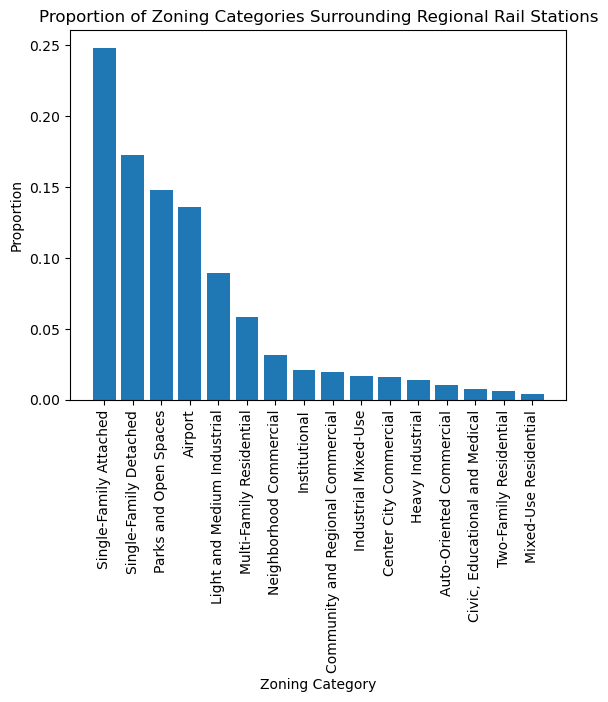

In [ ]:
buffer_zones = zoning_near_stations.groupby('Specific_Category')
single_family_detached = buffer_zones.get_group(('Single-Family Detached'))
single_family_detached_area = single_family_detached['Shape__Are'].sum()
single_family_detached_area
all_area = buffer_zones['Shape__Are'].sum()
proportion = all_area / all_area.sum()
proportion.sort_values(ascending=False, inplace=True)
sns.barplot(x=proportion.index, y=proportion.values, hue=proportion.index)
plt.ylabel('Proportion')
plt.xlabel('Zoning Category')
plt.xticks(rotation=90)
plt.xticks(proportion.index[:50])    # set here, ticks at step of 50
plt.title('Proportion of Zoning Categories Surrounding Regional Rail Stations')
plt.show()
# buffer_zones.head()
# somerton = buffer_zones.get_group('Somerton')
# somerton.head()
# somerton.groupby('S)
color = ['lightblue', 'blue', 'purple', 'red', 'black']



plt.bar(x=proportion.index, height=proportion.values)   
plt.ylabel('Proportion')
plt.xlabel('Zoning Category')
plt.xticks(rotation=90)
plt.set_cmap('Set1')
plt.xticks(proportion.index[:50])    # set here, ticks at step of 50
plt.title('Proportion of Zoning Categories Surrounding Regional Rail Stations')
plt.show()

Should be two maps with one map of area of philly, second of station. Should be similar to refugee map. 

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
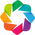

Launching server at http://localhost:54276


/var/folders/zr/w9ql8lf13n3bs53_49jy16qr0000gn/T/ipykernel_73911/398205545.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(station_area_proportion.index[:50], rotation=45, ha="right")  # Rotate labels for better fit


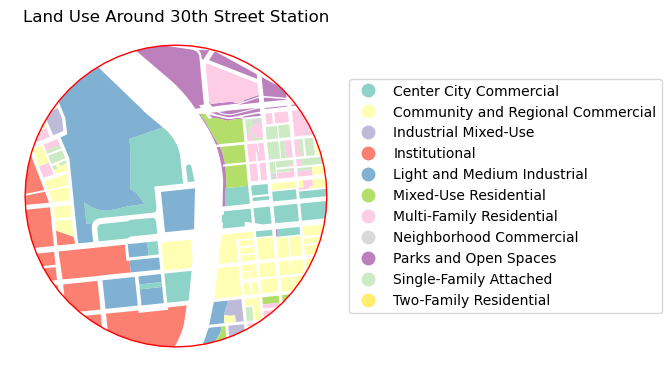

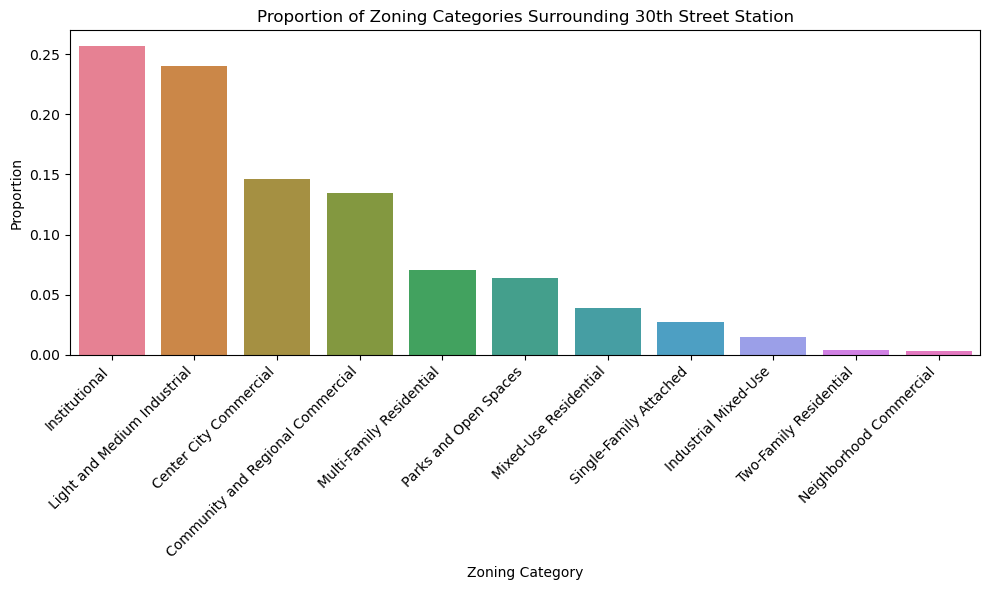

In [ ]:


# Enable HoloViews and Panel extensions
hv.extension('bokeh')
pn.extension(sizing_mode="stretch_width")  # Responsive design

# Create a list of station names for the dropdown
station_names = zoning_near_stations['Station_Na'].unique().tolist()
station_names.sort()

# Function to plot land use around a selected station
def plot_land_use(station_id):
    station_area = zoning_near_stations[zoning_near_stations['Station_Na'] == station_id]

    fig, ax = plt.subplots(figsize=(8, 8))  # Adjusted figure size

    # Plot the data with the legend inside the plot
    station_area.plot(ax=ax, column='Specific_Category', legend=True, cmap='Set3')

    # Plot the buffered station area with a red outline
    stations_buffered[stations_buffered['Station_Na'] == station_id].plot(ax=ax, color='none', edgecolor='red', )

    # Move the legend outside of the plot area
    legend = ax.get_legend()
    legend.set_bbox_to_anchor((1, 0.5))  # Move legend to the right side
    legend.set_loc('center left')  # Center the legend vertically

    plt.axis('off')  # Turn off the uneccesary axis

    plt.title(f'Land Use Around {station_id}')

    plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to make room for the legend
    
    return fig



def bar_plot(station_id):
    station_area = zoning_near_stations[zoning_near_stations['Station_Na'] == station_id]

    station_area = station_area.groupby('Specific_Category')
    station_area_total = station_area['Shape__Are'].sum()
    station_area_proportion = station_area_total / station_area_total.sum()
    station_area_proportion.sort_values(ascending=False, inplace=True)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.barplot(x=station_area_proportion.index, y=station_area_proportion.values, hue=station_area_proportion.index, ax=ax)
    ax.set_ylabel('Proportion')
    ax.set_xlabel('Zoning Category')
    ax.set_xticklabels(station_area_proportion.index[:50], rotation=45, ha="right")  # Rotate labels for better fit
    ax.set_title('Proportion of Zoning Categories Surrounding ' + str(station_id))

    plt.tight_layout()

    
    return fig

# Panel widget to select station
station_selector = pn.widgets.Select(name='Select Station', options=station_names)

# Panel interactive display
@pn.depends(station_selector)
def update_plots(station_id):
    plot1 = pn.pane.Matplotlib(plot_land_use(station_id), dpi=144)
    plot2 = pn.pane.Matplotlib(bar_plot(station_id), dpi=144)
    
    return pn.Tabs(
        ('Map View', plot1),
        ('Zoning Distribution', plot2)
    )

# Layout for the dashboard
dashboard = pn.Column(
    pn.pane.Markdown("## Land Use Around SEPTA Regional Rail Stations\n"
                     "Select a station from the dropdown to view the land use map and the zoning category distribution."),
    station_selector,
    update_plots
)

# Show the dashboard
dashboard.show()


<Axes: >

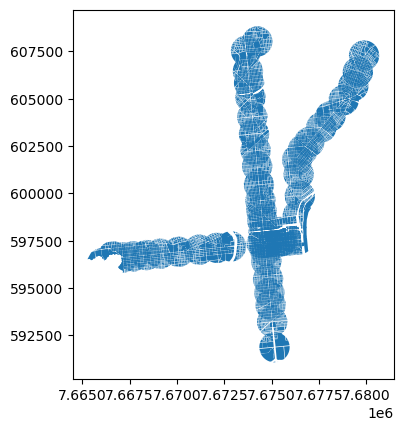

In [ ]:
metro_stations['Station'] = np.where(metro_stations['Station'].duplicated(), metro_stations['Station'] + ' ' + metro_stations['Route'], metro_stations['Station'])

metro_stations_buffered = metro_stations.copy()
metro_stations_buffered['geometry'] = metro_stations.geometry.buffer(800)  # Buffer by 800 meters

zoning_near_metro_stations = gpd.overlay(philly_zoning, metro_stations_buffered, how='intersection')
zoning_near_metro_stations.head()



zoning_near_metro_stations.plot()

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
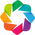

Launching server at http://localhost:60375


/var/folders/zr/w9ql8lf13n3bs53_49jy16qr0000gn/T/ipykernel_73911/3664821723.py:42: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout(rect=[0, 0, 0.75, 1])  # Adjust layout to make room for the legend


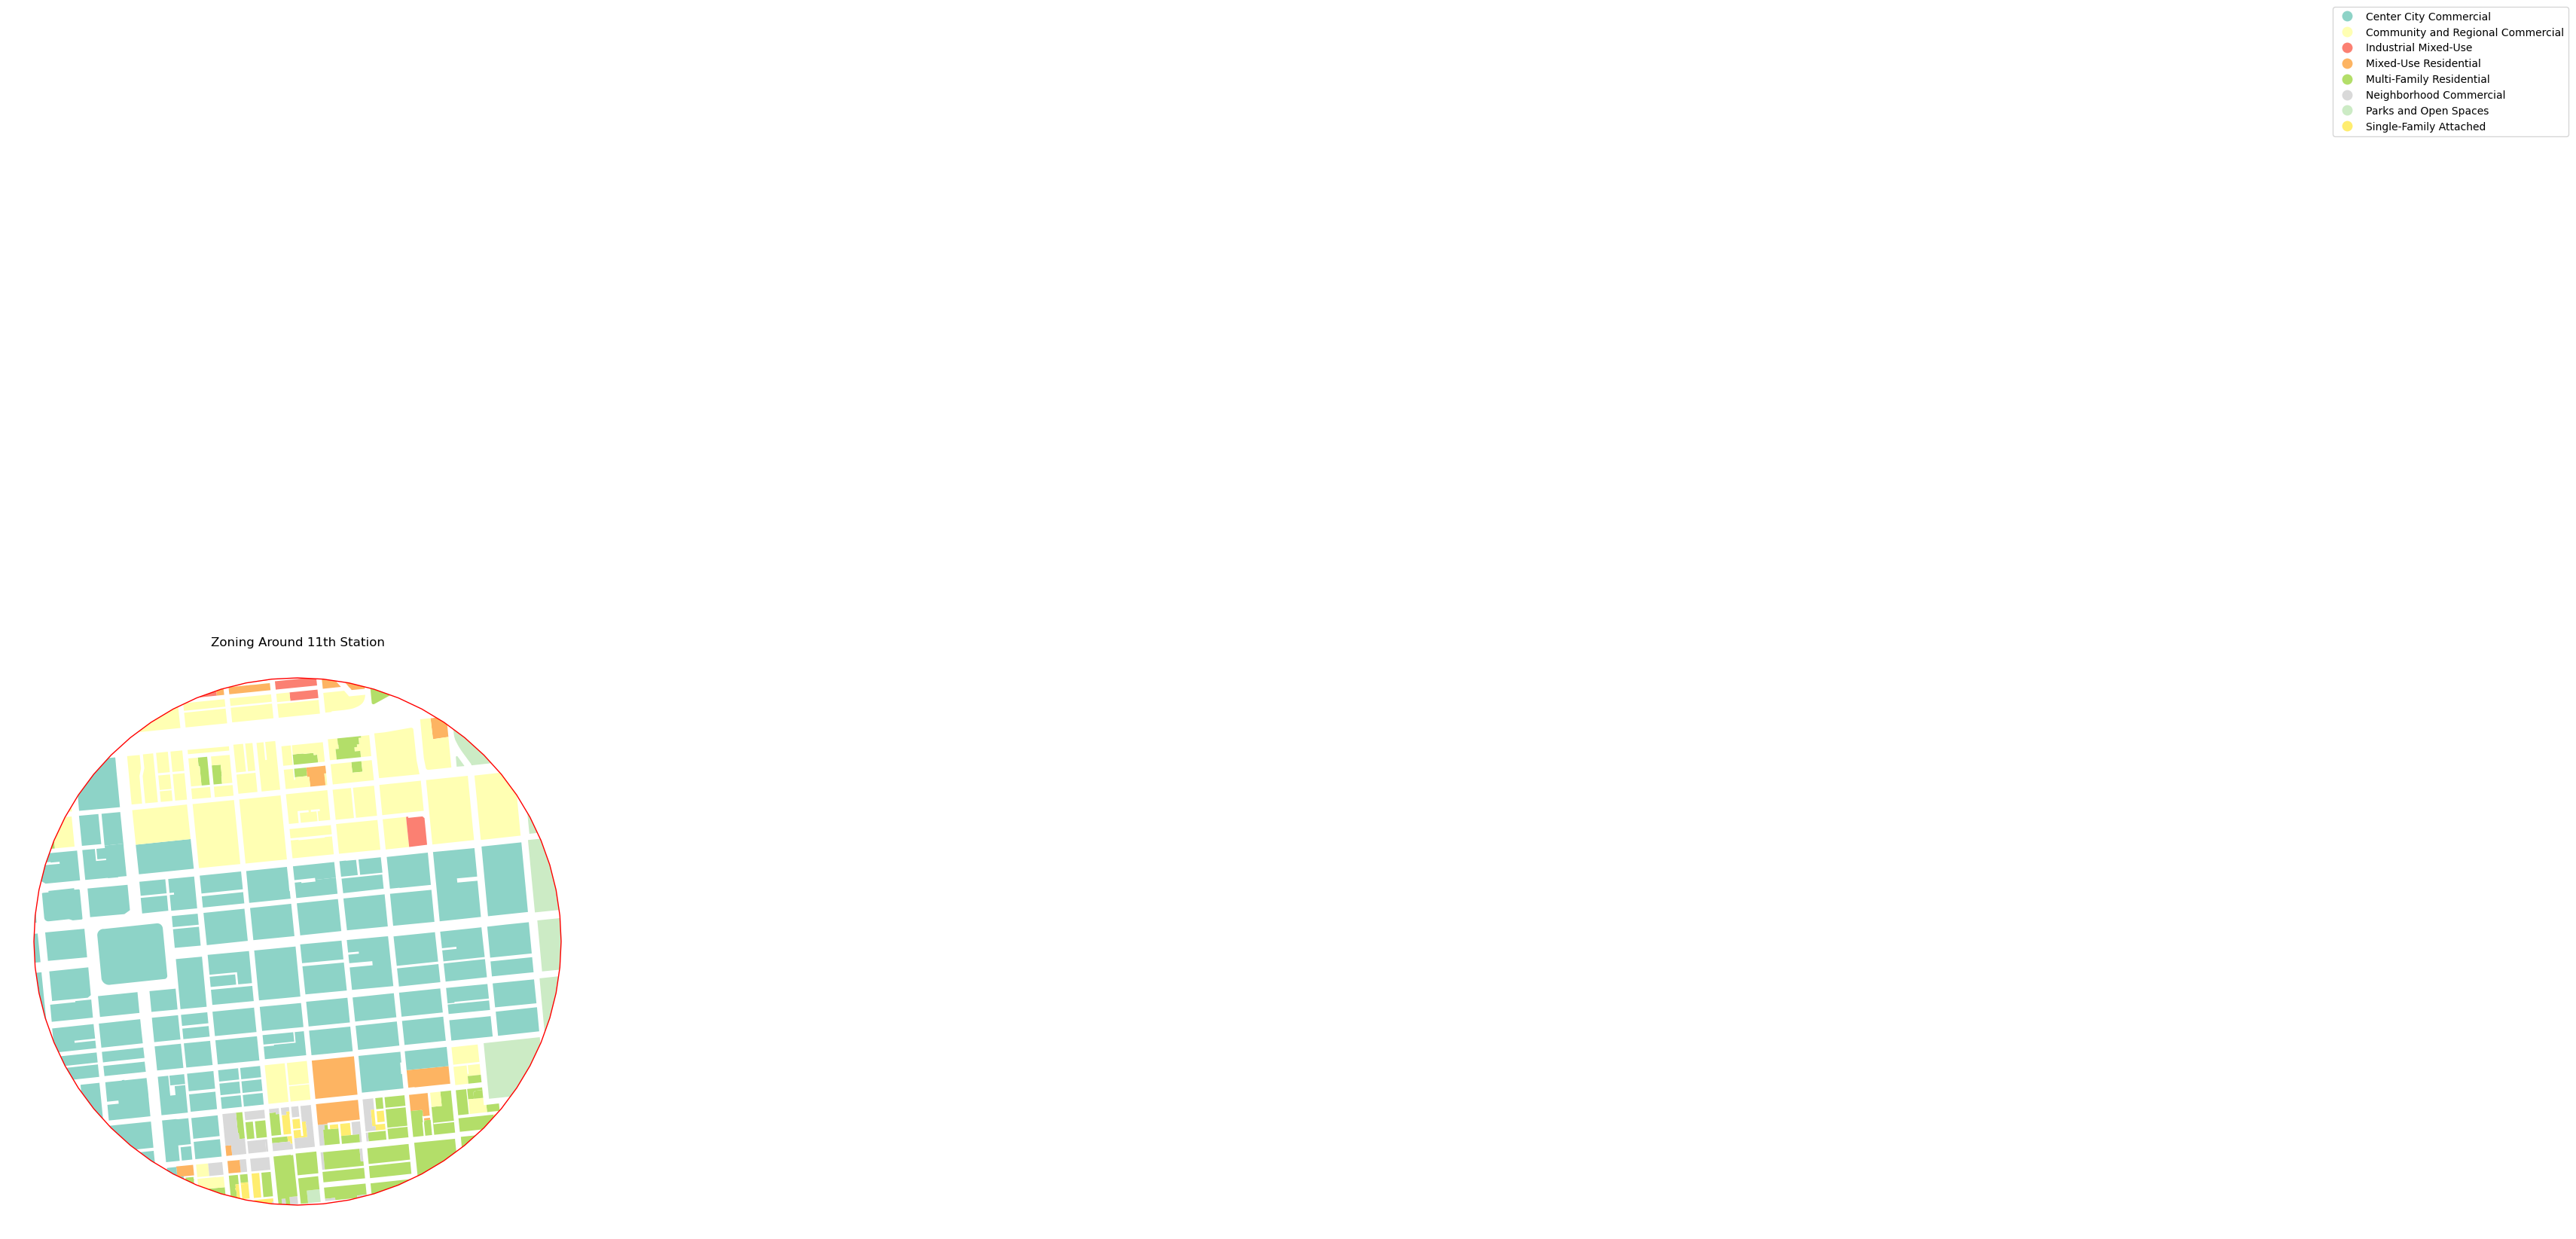

In [ ]:

# Enable HoloViews and Panel extensions
hv.extension('bokeh')
pn.extension(sizing_mode="stretch_width")

# Assuming zoning_near_metro_stations and metro_stations_buffered are your DataFrames
# Precompute and cache grouped data for fast access
metro_station_names = zoning_near_metro_stations['Station'].unique().tolist()
metro_station_names.sort()

metro_buffer_zones = zoning_near_stations.groupby('Specific_Category')
all_metro_area = metro_buffer_zones['Shape__Are'].sum()
metro_proportion = all_metro_area / all_metro_area.sum()
metro_proportion.sort_values(ascending=False, inplace=True)

# Group data by station and cache it
grouped_station_data = {
    station: zoning_near_metro_stations[zoning_near_metro_stations['Station'] == station] 
    for station in metro_station_names
}

# Function to create map view
def plot_land_use(station_id):
    metro_station_area = zoning_near_metro_stations[zoning_near_metro_stations['Station'] == station_id]

    fig, ax = plt.subplots(figsize=(10, 10))  # Adjusted figure size

    # Plot the data with the legend inside the plot
    metro_station_area.plot(ax=ax, column='Specific_Category', legend=True, cmap='Set3')

    # Plot the buffered station area with a red outline
    metro_stations_buffered[metro_stations_buffered['Station'] == station_id].plot(ax=ax, color='none', edgecolor='red', )

    # Move the legend outside of the plot area
    legend = ax.get_legend()
    legend.set_bbox_to_anchor((4, 2))  # Move legend to the right side
    legend.set_loc('center left')  # Center the legend vertically

    plt.axis('off')  # Turn off the uneccesary axis

    plt.title(f'Zoning Around {station_id} Station')

    plt.tight_layout(rect=[0, 0, 0.75, 1])  # Adjust layout to make room for the legend
    
    return fig

# Function to create bar plot
def create_bar_plot(filtered_data):
    metro_station_area_grouped = filtered_data.groupby('Specific_Category')
    metro_station_area_total = metro_station_area_grouped['Shape__Are'].sum()
    metro_station_area_proportion = metro_station_area_total / metro_station_area_total.sum()
    metro_station_area_proportion.sort_values(ascending=False, inplace=True)
    
    bar_plot = hv.Bars(metro_station_area_proportion).opts(
        title=f'Proportion of Zoning Categories',
        width=700, height=400,
        ylabel='Proportion',
        xlabel='Zoning Category',
        cmap=('brg'),  # Set color palette
        tools=['hover'],
        xrotation=45,
        show_legend=False
    )
    
    return bar_plot

# Function to create summary statistics
def create_summary_stats():
   bar_plot = hv.Bars(metro_proportion).opts(
        title=f'Proportion of Zoning Categories around SEPTA Heavy Rail Stations',
        width=700, height=400,
        ylabel='Proportion',
        xlabel='Zoning Category',
        cmap=('brg'),  # Set color palette
        tools=['hover'],
        xrotation=45,
        show_legend=False
    )
   return bar_plot

# Panel widget to select station
station_selector = pn.widgets.Select(name='Select Station', options=metro_station_names)

# Panel interactive display
@pn.depends(station_selector.param.value)
def update_plots(station_id):
    filtered_data = grouped_station_data[station_id]
    
    map_view = plot_land_use( station_id)
    bar_plot = create_bar_plot(filtered_data)
    summary_stats = create_summary_stats()
    
    return pn.Tabs(
        ('Map View', pn.Column(map_view, width=800)),
        ('Zoning Distribution', bar_plot),
        ('Summary', summary_stats)
    )

# Create the template
template = pn.template.BootstrapTemplate(title="SEPTA Heavy Rail Stations Land Use Dashboard")

# Add content to the template
template.main.append(
    pn.Column(
        pn.pane.Markdown("## Land Use Around SEPTA Heavy Rail Stations\n"
                         "Select a station from the dropdown to view the land use map and the zoning category distribution."),
        station_selector,
        update_plots,
        sizing_mode="stretch_width"
    )
)

# Show the dashboard
template.servable()

template.show()

In [ ]:
import geopandas as gpd
import holoviews as hv
import panel as pn
from holoviews.operation.datashader import datashade
import datashader as ds
import geoviews as gv

# Ensure you have all necessary imports
from geopandas import GeoDataFrame

# Group data by station and cache it
grouped_station_data = {
    station: zoning_near_metro_stations[zoning_near_metro_stations['Station'] == station] 
    for station in metro_station_names
}
def create_map_view(filtered_data, station, metro_stations_buffered):
    # Ensure filtered_data is a GeoDataFrame and in the correct CRS
    if not isinstance(filtered_data, GeoDataFrame):
        filtered_data = GeoDataFrame(filtered_data, geometry='geometry')

    if filtered_data.crs is None or filtered_data.crs != "EPSG:3857":
        filtered_data = filtered_data.to_crs("EPSG:3857")

    # Create a GeoViews Polygons object for zoning areas
    gdf = gv.Polygons(filtered_data, vdims=['Specific_Category'])

    # Get unique categories
    categories = filtered_data['Specific_Category'].unique()
    categories.sort()

    # Create a color map
    color_map = hv.Cycle('Category20')

    # Use datashader to efficiently render the polygons
    shaded = datashade(gdf, color_key=dict(zip(categories, color_map)), aggregator=ds.count_cat('Specific_Category'))

    # Ensure metro_stations_buffered is in the correct CRS
    if not isinstance(metro_stations_buffered, GeoDataFrame):
        metro_stations_buffered = GeoDataFrame(metro_stations_buffered, geometry='geometry')

    if metro_stations_buffered.crs is None or metro_stations_buffered.crs != "EPSG:3857":
        metro_stations_buffered = metro_stations_buffered.to_crs("EPSG:3857")

    # Add station marker
    station_point = gv.Points(metro_stations_buffered[metro_stations_buffered['Station'] == station], 
                              crs=gdf.crs).opts(color='red', size=10, marker='star')

    # Create a color key
    color_key = hv.NdOverlay({cat: hv.Points([0, 0], label=cat).opts(color=color, size=10) 
                              for cat, color in zip(categories, color_map)})

    # Combine the layers
    map_view = (shaded * station_point * color_key).opts(
        width=700, height=500, 
        title=f'Land Use Around {station}',
        legend_position='right'
    )
    
    return map_view

# Panel widget to select station
station_selector = pn.widgets.Select(name='Select Station', options=metro_station_names)

# Panel interactive display
@pn.depends(station_selector.param.value)
def update_plots(station_id):
    filtered_data = grouped_station_data[station_id]
    
    map_view = create_map_view(filtered_data, station_id, metro_stations_buffered)
    bar_plot = create_bar_plot(filtered_data)
    summary_stats = create_summary_stats(filtered_data, station_id)
    
    return pn.Tabs(
        ('Map View', pn.Column(map_view, width=800)),
        ('Zoning Distribution', bar_plot),
        ('Summary', summary_stats)
    )

# Create the template
template = pn.template.BootstrapTemplate(title="SEPTA Heavy Rail Stations Land Use Dashboard")

# Add content to the template
template.main.append(
    pn.Column(
        pn.pane.Markdown("## Land Use Around SEPTA Heavy Rail Stations\n"
                         "Select a station from the dropdown to view the land use map and the zoning category distribution."),
        station_selector,
        update_plots,
        sizing_mode="stretch_width"
    )
)

# Show the dashboard
template.servable()
template.show()


Launching server at http://localhost:60126


In [ ]:

print(metro_stations_buffered.head())
print(metro_stations_buffered.crs)


   FID              Route            Station   Latitude  Longitude  \
0    1  Broad Street Line                NRG  39.905434 -75.173936   
1    2  Broad Street Line             Oregon  39.916815 -75.171339   
2    3  Broad Street Line             Snyder  39.924386 -75.169681   
3    4  Broad Street Line      Tasker-Morris  39.929848 -75.168501   
4    5  Broad Street Line  Ellsworth-Federal  39.936194 -75.167129   

                                            geometry  
0  POLYGON ((7675950.622 591876.943, 7675946.769 ...  
1  POLYGON ((7675832.079 593212.907, 7675828.227 ...  
2  POLYGON ((7675747.161 594099.973, 7675743.309 ...  
3  POLYGON ((7675684.506 594739.534, 7675680.654 ...  
4  POLYGON ((7675611.662 595482.599, 7675607.810 ...  
EPSG:3347
